In [95]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [96]:
current_directory = os.getcwd()
titanic_dataset = pd.read_csv(f'{current_directory}\\Titanic-Dataset.csv')

titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)

C:\Users\Alexander Jon\AppData\Local\Temp\ipykernel_11152\2334375040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)


In [99]:
titanic_dataset.dropna()
titanic_dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [100]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [101]:
titanic_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
titanic_dataset.drop(columns=['SibSp', 'Parch'], inplace=True)

In [103]:
age_per_pclass = titanic_dataset.groupby('Pclass')['Age'].agg(['count','mean', 'median', 'std']).reset_index()
age_per_survived = titanic_dataset.groupby('Survived')['Age'].agg(['count','mean', 'median', 'std']).reset_index()

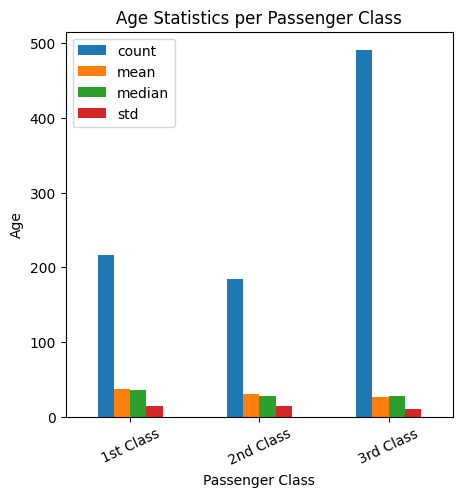

In [104]:
ax = age_per_pclass[['count','mean', 'median', 'std']].plot(kind='bar', figsize=(5, 5), rot=0)
ax.set_xticks(range(len(age_per_pclass)))
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=25)
plt.title('Age Statistics per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [105]:
age_per_survived

,Survived,count,mean,median,std
0,0,549,30.028233,28.0,12.499986
1,1,342,28.291433,28.0,13.764425


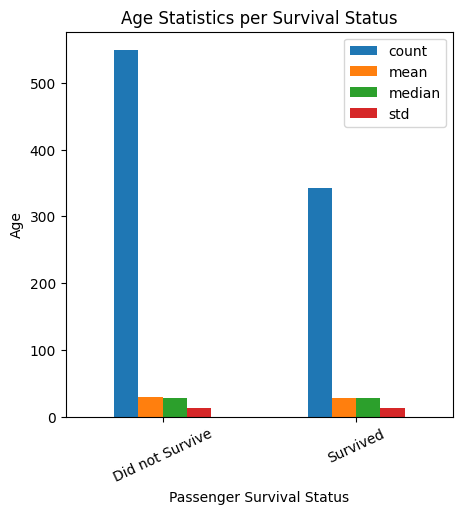

In [106]:
ax = age_per_survived[['count','mean', 'median', 'std']].plot(kind='bar', figsize=(5, 5), rot=0)
ax.set_xticks(range(len(age_per_survived)))
ax.set_xticklabels(['Did not Survive', 'Survived'], rotation=25)
plt.title('Age Statistics per Survival Status')
plt.xlabel('Passenger Survival Status')
plt.ylabel('Age')
plt.show()

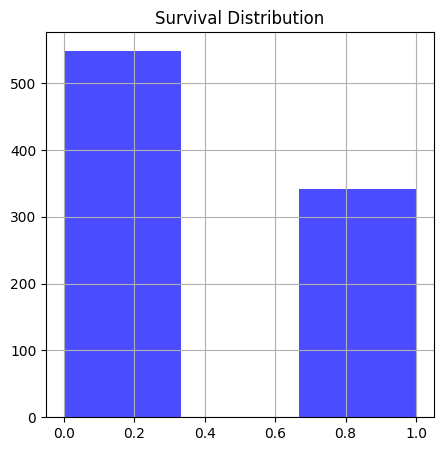

In [107]:
titanic_dataset['Survived'].hist(bins=3, figsize=(5, 5), color='blue', alpha=0.7)
plt.title('Survival Distribution')
plt.show()